<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

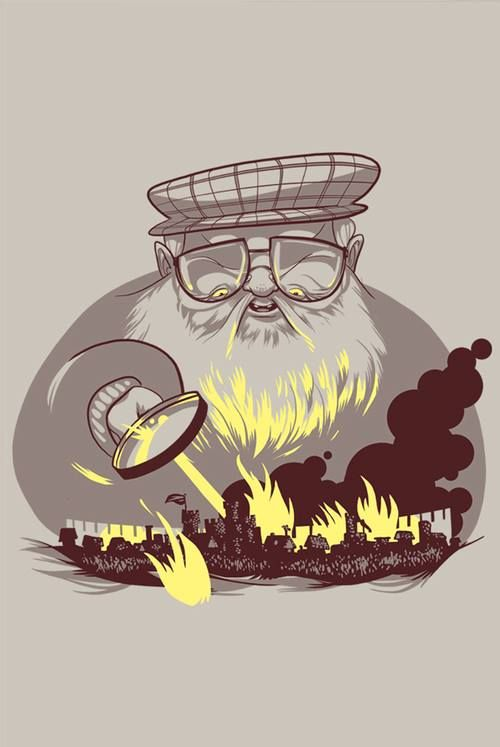

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [199]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 48.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 31.2MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # пригодится

Здесь отключаю предупреждения, которые вылезают при испрользовании inplace в библиотеке pandas(не очень приятно их видеть):

In [201]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [202]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col = "S.No")
data_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col = "S.No")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [203]:
data.isnull().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


1.3.1. Поработаем с колонкой age и dateOfBirth:



Text(0.5, 1.0, 'dateOfBirth')

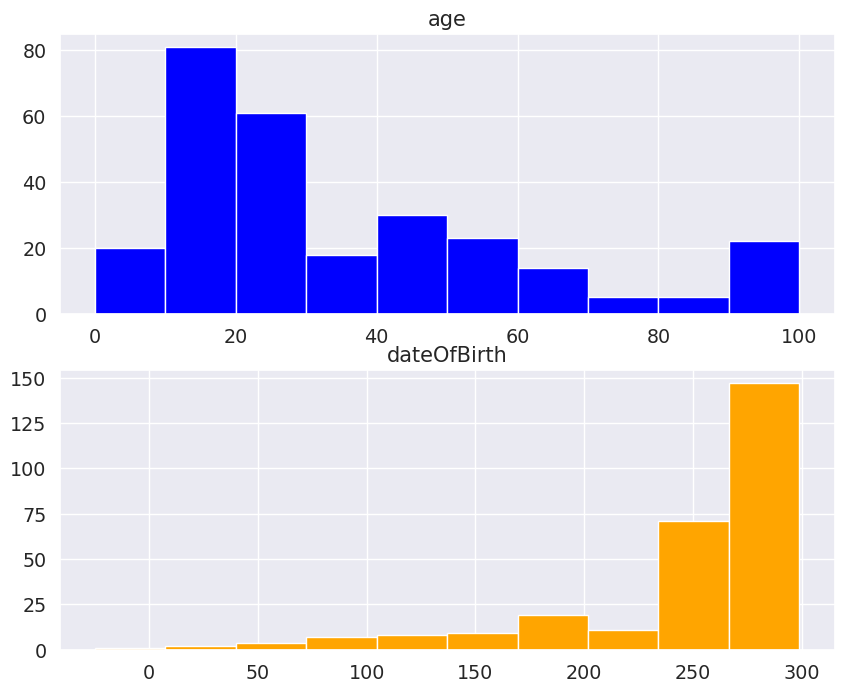

In [204]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.hist(data["age"], color="blue")
ax1.set_title("age")

ax2.hist(data["dateOfBirth"], color="orange")
ax2.set_title("dateOfBirth")

Можно увидеть, что распределения ассиметричные, поэтому предпочтительнее выбрать медиану в качестве меры центральной тенденции(среднее не устойчиво к выбросам, которые тут непосредственно имеются). При том, что пропущено достаточно много значений, удалять эти столбцы не хочется. Поэтому заполним медианой, но для начала я кое-что заметил: присутствуют очень старые даты, что означает, что человек не жив, и ещё исходя из условия, что сейчас 305 год можно, учитывая возраст, высчитать умер человек или нет. Перед тем как заполним пропуски в age и dateOfBirth медианой, создадим новый признак "status" - если известна дата рождения и возраст, то логика такая: если возраст + год не равен 305, то статус "dead", иначе "alive", а если дата с возрастом не известны, то "unknown".

In [205]:
def status(x):
  if pd.isna(x["age"]) == False or pd.isna(x["dateOfBirth"]) == False:
    if (x["age"] + x["dateOfBirth"] != 305):
      return "dead"
    else:
      return "alive"
  return "unknown"

data["status"] = data[["age", "dateOfBirth"]].apply(status, axis=1)

data_test["status"] = data_test[["age", "dateOfBirth"]].apply(status, axis=1)

data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,status
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,unknown
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,alive
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,unknown
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,dead
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,alive


Теперь как и хотели заполним пропуски в age и dateOfBirth медианами(для тестового датасета так же берём медианы из тренировочного датасета, так как по идее в иделе нельзя заглядывать в данные тестового).

In [206]:
data["age"].fillna(data["age"].median(), inplace = True)

data_test["age"].fillna(data["age"].median(), inplace = True)

data["dateOfBirth"].fillna(data["dateOfBirth"].median(), inplace = True)

data_test["dateOfBirth"].fillna(data["dateOfBirth"].median(), inplace = True)

1.3.2. Поработаем с колонкой house:
Можно заметить, что в колонке name у некоторых присутствует "имя дома", идея такая: в строках, где отсутсвует название дома, попробовать вынести его из имени(путём сравнения предполагаемого дома из уже известных нам названий из колонки house).

In [207]:
# Для начала создадим список, с уже известными домами:
house_names = data["house"].unique()

# Напишем функцию, которая выполняет описанное выше действие:
def house_name(x):
  for name in x.split():
    if "House " + name in house_names:
      return "House " + name

data["house"].fillna(data["name"].apply(house_name), inplace = True)
print(data["house"].isnull().sum())

data_test["house"].fillna(data_test["name"].apply(house_name), inplace = True)

338


Можно заметить, что немного пропусков таким образом удалось заполнить, но всё равно ещё много NaN значений, предлагаю оставить самые популярные дома, а другие объеденить в "Other", где остались пропущенные значения сделать "Unknown".

In [208]:
data["house"].value_counts().values[:10]

array([91, 88, 64, 54, 37, 35, 31, 20, 15, 12])

Допустим, оставим дома, где >= 20 человек:

In [209]:
house_dict = data["house"].value_counts().to_dict()

def houses_names(x):
  if pd.isna(x) == False:
    if x in house_dict:
      if house_dict[x] < 20:
        return "Other"
      else:
        return x
    else:
      return "Other"
  else:
    return "Unknown"

data["house_name"] = data["house"].apply(houses_names)
print(data["house_name"].value_counts())

data_test["house_name"] = data_test["house"].apply(houses_names)

house_name
Other              799
Unknown            338
House Frey          91
Night's Watch       88
House Stark         64
House Targaryen     54
House Lannister     37
House Tyrell        35
House Greyjoy       31
House Osgrey        20
Name: count, dtype: int64


1.3.3. Столбцы culture и title, можно заполнить модой, но как по мне там слишком много пропусков, поэтому не стану заполнять пустые значения в них(собственно в дальнейшем "дропну" эти признаки).



1.3.4. Остальные столбцы:
В таких столбцах как mother - isAliveMother, father - isAliveFather, heir - isAliveHeir, spouse - isAliveSpouse слишком много пропусков, в случае с супрогой/ом можно сделать предположение, что у рассмотренного человека нет супруги/а, и как-нибудь работать исходя из этого, так же в принципе и в случае наследника, но я оставлю эти столбцы как есть, не буду в дальнейшем с ними работать.

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [210]:
# Создаю признак isPopular(в дальнейшем всё равно оставлю popularity, как мне кажется он больше подходит, так как при признаке isPopular данные "упрощаются"(как бытеряются))
data["isPopular"] = data["popularity"].apply(lambda x: 0 if x < 0.5 else 1)

# На счёт второго пункта, это как по мне странное решение, по моей логике, персонажи, у которых было много отношений с мертвыми персонажами более вероятно, что они мертвы,
# поэтому подразделять людей на тех, у кого были хоть какие-либо связи с мертвыми или нет, как-то непонятно, скорее всего не буду использовать этот признак в дальнейшем
data["boolDeadRelations"] = data["numDeadRelations"].apply(lambda x: 1 if x > 0 else 0)


In [211]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Напишу для последнего подпункта функцию:
def culture(x):
  for c in cult:
    if x in cult[c]:
      return c
  return x

data["culture"] = data["culture"].apply(culture)

data[["isPopular", "boolDeadRelations", "culture"]].head()

,isPopular,boolDeadRelations,culture
S.No,,,
1,1,1,NaN
2,1,1,Rivermen
3,0,0,NaN
4,0,0,NaN
5,0,0,Dornish


Ещё пришла идея создать новый столбец "proba_books" - шанс человека выжить исходя из присутсвия в книгах, логика такая: если человек появился  в первой книге, а в следующих четырёх отсутствовал, то его шанс выжить 20%, если появился и в первой, и во второй, а во остальных трёх пропал, то 40%, если появился во всех пяти, то 100% и т.д. Но тут я заметил одну особенность, есть персонажи, которые не появлялись ни в одной книги, скорее всего это ошибка(с помощью Википедии даже удалось это проверить), возьмём, что у них шанс выжить 50%(просто навскидку).

In [212]:
# Напишу функцию, которая реализует указанную выше идею:
def proba_books(x):
  if x["book1"] == 1:
    return x.sum() / 5 * 100
  elif x["book2"] == 1:
    return x.sum() / 4 * 100
  elif x["book3"] == 1:
    return x.sum() / 3 * 100
  elif x["book4"] == 1:
    return x.sum() / 2 * 100
  elif x["book5"] == 1:
    return 100
  else:
    return 50

data["proba_books"] = data[["book1", "book2", "book3", "book4", "book5"]].apply(proba_books, axis=1)
data_test["proba_books"] = data_test[["book1", "book2", "book3", "book4", "book5"]].apply(proba_books, axis=1)

data[["book1", "book2", "book3", "book4", "book5", "proba_books", "isAlive"]].head()

,book1,book2,book3,book4,book5,proba_books,isAlive
S.No,,,,,,,
1,0,0,0,0,0,50.0,0
2,1,1,1,1,1,100.0,1
3,0,0,0,1,0,50.0,1
4,0,0,0,0,0,50.0,0
5,0,0,0,1,0,50.0,1


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

Исходя из всех выше изложенных мной рассуждений я пришёл к такому выводу: надо удалить следующие столбцы из-за NaN'ов: 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'title', 'culture', 'spouse'. Ещё удалим колонку 'house', т.к. я сделал новую колонку 'house_name'. И по логике никак не влияет на предсказание колонка 'name', поэтому её тоже следует удалить. Ещё мне не нравится созданная в прошлом пункте колонка 'boolDeadRelations', там я объяснил почему, поэтому её удалю, а 'numDeadRelations' оставлю. Так же поступлю с колонкой 'isPopular' и оставлю 'popularity'.

In [213]:
data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'title', 'culture', 'spouse', 'house', 'name', 'boolDeadRelations', 'isPopular'], inplace = True)

data_test.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'title', 'culture', 'spouse', 'house', 'name'], inplace = True)

In [214]:
data.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,status,house_name,proba_books
S.No,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,0,0,24.0,11,0.605351,0,unknown,House Targaryen,50.0
2,1,208.0,1,1,1,1,1,1,1,97.0,1,0.896321,1,alive,House Frey,100.0
3,1,272.0,0,0,0,1,0,0,1,24.0,0,0.267559,1,unknown,Other,50.0
4,0,82.0,0,0,0,0,0,1,1,23.0,0,0.183946,0,dead,Other,50.0
5,0,276.0,0,0,0,1,0,1,1,29.0,0,0.043478,1,alive,Other,50.0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Тут максимально очевидно, что целевая переменная является категориальной, рассмотрю дисбаланс классов:

,proportion
isAlive,
1,0.77842
0,0.22158


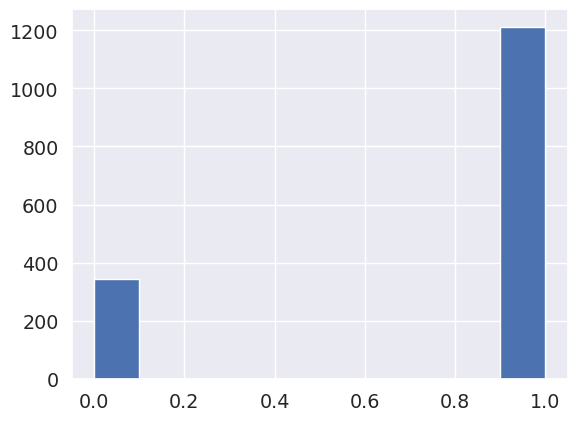

In [215]:
plt.hist(data["isAlive"])
data["isAlive"].value_counts(normalize=True)

Дисбаланс классов присутсвует, людей, которые выжили примерно в три раза больше, чем тех, кто умер. Константная модель, которая "предсказывает" только положительный класс будет давай accuracy на данной выборке около 0.77

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

1.7.1. Обработаем катгориальные признаки с помощью OHE

In [216]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[["house_name", "status"]])
one_hot_data = pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(["house_name", "status"]), index=data.index)
data = pd.concat([data, one_hot_data], axis=1)
data.drop(columns=["house_name", "status"], inplace=True)

one_hot_encoded_test = encoder.transform(data_test[["house_name", "status"]])
one_hot_data_test = pd.DataFrame(one_hot_encoded_test,columns=encoder.get_feature_names_out(["house_name", "status"]), index=data_test.index)
data_test = pd.concat([data_test, one_hot_data_test], axis=1)
data_test.drop(columns=["house_name", "status"], inplace=True)

data.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,house_name_House Osgrey,house_name_House Stark,house_name_House Targaryen,house_name_House Tyrell,house_name_Night's Watch,house_name_Other,house_name_Unknown,status_alive,status_dead,status_unknown
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,0,0,24.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,208.0,1,1,1,1,1,1,1,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,272.0,0,0,0,1,0,0,1,24.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,82.0,0,0,0,0,0,1,1,23.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0,276.0,0,0,0,1,0,1,1,29.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Построю тепловую карту матрицы корреляций между числовыми признаками(тут не буду рассматривать те категориальные, которые я преобразовал, так как получится слишком большая матрица, но рассмотрю бинарные, кроме книг по той же причине):

<Axes: >

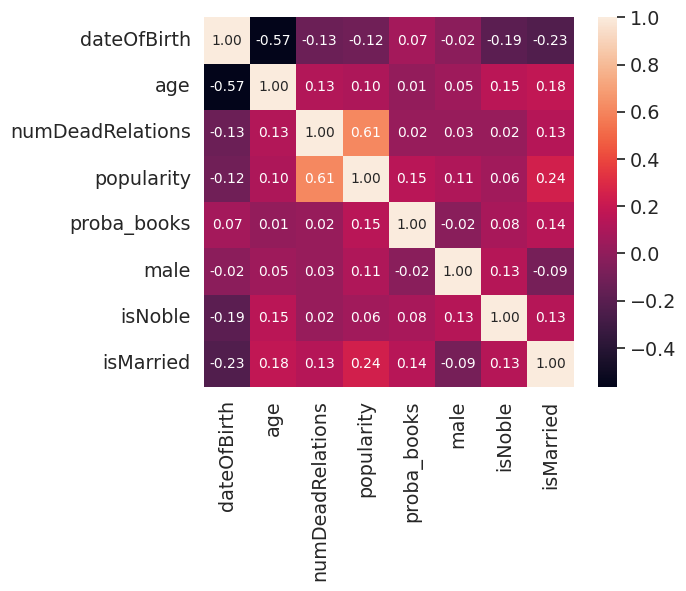

In [217]:
corrmat = data[["dateOfBirth", "age",	"numDeadRelations",	"popularity", "proba_books", "male", "isNoble", "isMarried"]].corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

Можно заметить, что между собой коррелируют признаки "popularity" - "numDeadRelations" и "age" - "dateOfBirth(отрицательная корреляция). Я считаю, что эти значений корреляции приемлемы и поэтому с этим ничего делать не надо(мультиколлинеарность не будет возникать).

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Сначала сделаю тепловую карту матрицы корреляций только целевого признака с теми признаками, которые были рассмотрены в прошлом шаге:

<Axes: >

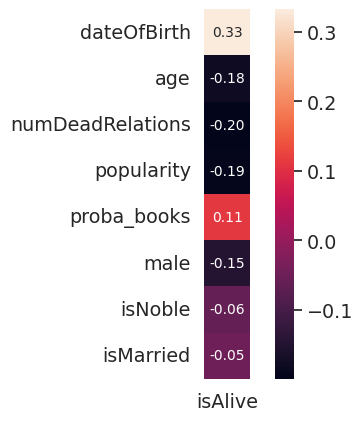

In [218]:
corr_target = data[["dateOfBirth", "age",	"numDeadRelations",	"popularity", "proba_books", "male", "isNoble", "isMarried", "isAlive"]].corr()['isAlive'].drop('isAlive').to_frame()
corr_target
f, ax = plt.subplots()
sns.heatmap(corr_target, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

Наибольшая корреляция с датой рождения, теперь предлагаю рассмотреть созданный признак "proba_books":

Text(0.5, 1.0, 'Proba_books Distribution by isAlive')

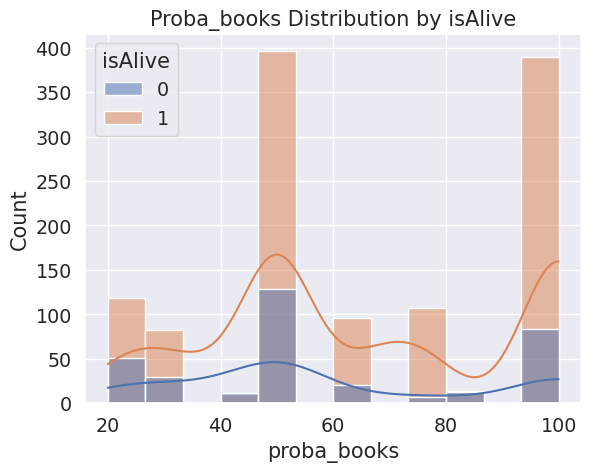

In [219]:
sns.histplot(data=data, x='proba_books', kde=True, hue='isAlive',)
plt.title('Proba_books Distribution by isAlive')

Как будто из-за персонажей, которые отсутсвовали во всех книгах(им я выставил шанс 50%), моя идея портится, но какая-то тенденция в этом всё равно прослеживается. В общем считаю анализ влияния признаков на целевую переменную можно на этом закончить(конечно ещё можно построить несколько круговых диаграмм и диаграмм рассеивания), так как все преобразования к которым я пришёл, я уже сделал, и все выводы написаны выше(на протяжении всего исследования). Поэтому перейдём к финальной части.


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [220]:
Х = data.drop(columns=["isAlive"])
y = data["isAlive"]

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(Х, y, test_size=0.2, stratify=y, random_state=123)

Ещё можно произвести масштабирование признаков, но пока что не буду это делать.

In [223]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#data_test = scaler.transform(data_test)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [224]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [225]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [226]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, random_state=123)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_logr = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [227]:
# Шаг 1. Создание моделей
ada_boost = AdaBoostClassifier(random_state=123)
random_forest = RandomForestClassifier(random_state=123)
gaussian_process = GaussianProcessClassifier(random_state=123)
naive_bayes = GaussianNB()
k_neighbors = KNeighborsClassifier()
svc = SVC(random_state=123)
decision_tree = DecisionTreeClassifier(random_state=123)

# Шаг 2. Обучение моделей
ada_boost.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
k_neighbors.fit(X_train, y_train)
svc.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gp = gaussian_process.predict(X_test)
y_pred_nb = naive_bayes.predict(X_test)
y_pred_knn = k_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [228]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [229]:
# Шаг 3. Предсказание на тестовых данных
y_pred_logr = logistic_regression.predict(X_test)
y_pred_train_logr = logistic_regression.predict(X_train)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_logr)
print("Accuracy test: %.4f" % accuracy)
accuracy_train = accuracy_score(y_train, y_pred_train_logr)
print("Accuracy train: %.4f" % accuracy_train)

Accuracy test: 0.8365
Accuracy train: 0.8586


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [230]:
# Дерево решений
y_pred_train_dt = decision_tree.predict(X_train)
accuracy_dt= accuracy_score(y_test, y_pred_dt)
print("Accuracy test for Decision Tree: %.4f" % accuracy_dt)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
print("Accuracy train for Decision Tree: %.4f\n" % accuracy_train_dt)

# Случайный лес
y_pred_train_rf = random_forest.predict(X_train)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy test for Random Forest: %.4f" % accuracy_rf)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
print("Accuracy train for Random Forest: %.4f\n" % accuracy_train_rf)

# K-Nearest Neighbors
y_pred_train_knn = k_neighbors.predict(X_train)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy test for K Neighbors: %.4f" % accuracy_knn)
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
print("Accuracy train for K Neighbors: %.4f\n" % accuracy_train_knn)

# Наивный байес
y_pred_train_nb = naive_bayes.predict(X_train)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy test for GaussianNB: %.4f" % accuracy_nb)
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
print("Accuracy train for GaussianNB: %.4f\n" % accuracy_train_nb)

# SVC
y_pred_train_svc = svc.predict(X_train)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy test for SVC: %.4f" % accuracy_svc)
accuracy_train_svc = accuracy_score(y_train, y_pred_train_svc)
print("Accuracy train for SVC: %.4f\n" % accuracy_train_svc)

# AdaBoost
y_pred_train_ada = ada_boost.predict(X_train)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy test for AdaBoost: %.4f" % accuracy_ada)
accuracy_train_ada = accuracy_score(y_train, y_pred_train_ada)
print("Accuracy train for AdaBoost: %.4f\n" % accuracy_train_ada)

# Gaussian Process
y_pred_train_gp = gaussian_process.predict(X_train)
accuracy_gp = accuracy_score(y_test, y_pred_gp)
print("Accuracy test for Gaussian Process: %.4f" % accuracy_gp)
accuracy_train_gp = accuracy_score(y_train, y_pred_train_gp)
print("Accuracy train for Gaussian Process: %.4f\n" % accuracy_train_gp)

Accuracy test for Decision Tree: 0.7981
Accuracy train for Decision Tree: 0.9727

Accuracy test for Random Forest: 0.8558
Accuracy train for Random Forest: 0.9727

Accuracy test for K Neighbors: 0.8141
Accuracy train for K Neighbors: 0.8707

Accuracy test for GaussianNB: 0.8237
Accuracy train for GaussianNB: 0.8353

Accuracy test for SVC: 0.8045
Accuracy train for SVC: 0.8120

Accuracy test for AdaBoost: 0.8654
Accuracy train for AdaBoost: 0.8795

Accuracy test for Gaussian Process: 0.8269
Accuracy train for Gaussian Process: 0.8819



Выберите лучшую модель.

Лучше всех себя показывает AdaBoost и RandomForest, но случайный лес очень переобучается, попробуем сравнить качество этих двух моделей с подбором гиперпараметров(GridSearch). Сначало проверим randomforest:

In [231]:
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [5, 10, 20, 30, 50],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6]
}

gridsearch = GridSearchCV(random_forest, param_grid, scoring='accuracy', n_jobs=-1)

gridsearch.fit(X_train, y_train)

best_model = gridsearch.best_estimator_

forest_pred = best_model.predict(X_test)
forest_pred_train = best_model.predict(X_train)


In [232]:
gridsearch.best_score_

0.865863453815261

In [233]:
gridsearch.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 30}

In [234]:
print("Accuracy test: %.4f" % accuracy_score(y_test, forest_pred))
print("Accuracy train: %.4f\n" % accuracy_score(y_train, forest_pred_train))

Accuracy test: 0.8654
Accuracy train: 0.8988



Теперь проверим AdaBoost:

In [235]:
ada = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 2],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, param_grid, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model_ada = grid_search.best_estimator_

ada_pred = best_model_ada.predict(X_test)
ada_pred_train = best_model_ada.predict(X_train)

In [236]:
grid_search.best_score_

0.8690763052208835

In [237]:
grid_search.best_params_

{'algorithm': 'SAMME.R',
 'estimator': DecisionTreeClassifier(max_depth=1),
 'learning_rate': 1,
 'n_estimators': 200}

In [238]:
print("Accuracy test: %.4f" % accuracy_score(y_test, ada_pred))
print("Accuracy train: %.4f\n" % accuracy_score(y_train, ada_pred_train))

Accuracy test: 0.8654
Accuracy train: 0.8859



В общем AdaBoost и RandomForest выдают примерно одинаковые значения, предпочту использовать случайный лес, потому что с AdaBoost совершенно не знаком.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [239]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.7MB/s]


In [240]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')
submission["isAlive"] = best_model.predict(data_test)

In [241]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [242]:
submission.to_csv("/content/new_submission.csv", index=False)